In [2]:
#DB Connection 
import pymssql
import pandas as pd
import pyodbc
import numpy as np
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=Martin-PC\SQLEXPRESS;"
                     "Database=FootballData;"
                     "Trusted_Connection=yes;")
#conn = pymssql.connect(server="localhost", user="",password="", port=63642)  # You can lookup the port number inside SQL server. 

data_folder = 'DataAnalysisFootball/data/'

In [3]:
#Matches select
stmt = """SELECT Teams.FullName as HomeTeam, Teams2.FullName as AwayTeam, 
        Teams.ExternalId as HomeTeamId, Teams2.ExternalId as AwayTeamId
	  ,[Matches].ExternalId as ExternalId
      ,[Date]
      ,[Country]
      ,[League]
      ,[Season]
      ,[Stage]
      ,[AwayTeam_Id]
      ,[HomeTeam_Id]
FROM  [FootballData].[dbo].[Matches]
LEFT JOIN [Teams] ON Matches.HomeTeam_Id = Teams.Id
LEFT JOIN [Teams] as Teams2 ON Matches.AwayTeam_Id = Teams2.Id"""
# Excute Query here
df_matches = pd.read_sql(stmt,conn)
df_matches.drop_duplicates(['ExternalId'], inplace=True)
df_matches['Date']=pd.to_datetime(df_matches['Date'])
print(df_matches.shape)
df_matches.head(10)

(7750, 12)


,HomeTeam,AwayTeam,HomeTeamId,AwayTeamId,ExternalId,Date,Country,League,Season,Stage,AwayTeam_Id,HomeTeam_Id
0,Leicester,Everton,8197,8668,1723984,2014-08-18 15:00:00,England,Premier League,2014/2015,1,13,9
1,Burnley,Chelsea,8191,8455,1723983,2014-08-18 15:00:00,England,Premier League,2014/2015,1,14,10
2,Liverpool,Southampton,8650,8466,1723985,2014-08-18 15:00:00,England,Premier League,2014/2015,1,15,12
3,Arsenal,Crystal Palace,9825,9826,1723982,2014-08-18 15:00:00,England,Premier League,2014/2015,1,16,11
4,Manchester United,Swansea,10260,10003,1723986,2014-08-18 15:00:00,England,Premier League,2014/2015,1,26,25
5,Newcastle United,Manchester City,10261,8456,1723987,2014-08-18 15:00:00,England,Premier League,2014/2015,1,28,27
6,Stoke,Aston Villa,10194,10252,1723989,2014-08-18 15:00:00,England,Premier League,2014/2015,1,34,33
7,Queens Park Rangers,Hull,10172,8667,1723988,2014-08-18 15:00:00,England,Premier League,2014/2015,1,36,35
8,West Bromwich Albion,Sunderland,8659,8472,1723990,2014-08-18 15:00:00,England,Premier League,2014/2015,1,38,37
9,West Ham,Tottenham,8654,8586,1723991,2014-08-18 15:00:00,England,Premier League,2014/2015,1,40,39


In [4]:
df_matches['Date'].min()

Timestamp('2014-08-10 15:00:00')

In [5]:
df_matches['Date'].max()

Timestamp('2019-05-12 14:00:00')

In [6]:
#Shots on select
stmt = "SELECT * FROM ShotOns"
# Excute Query here
df_shots_on = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_shots_on.shape)
df_shots_on.drop_duplicates(['ExternalId'], inplace=True)

#Shots off select
stmt = "SELECT * FROM ShotOffs"
# Excute Query here
df_shots_off = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_shots_off.shape)
df_shots_off.drop_duplicates(['ExternalId'], inplace=True)

#Possessions select
stmt = "SELECT * FROM Possessions"
# Excute Query here
df_possessions = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_possessions.shape)
df_possessions.drop_duplicates(['ExternalId'], inplace=True)
df_possessions.replace('', np.nan, inplace=True)
df_possessions.dropna(axis=0, how='any', inplace=True)

df_possessions['HomePossession'] = df_possessions['HomePossession'].astype(int)
df_possessions['AwayPossession'] = df_possessions['AwayPossession'].astype(int)
df_possessions['Minute'] = df_possessions['Minute'].astype(int)
#df_possessions['TeamId'] = df_possessions['TeamId'].astype(str)
df_possessions.sample(5)


(83999, 6)
(82698, 6)
(104795, 7)


,Id,ExternalId,MatchId,Minute,HomePossession,AwayPossession,TeamId
35207,35208,7739578,2525373,20,67,33,0
45138,45139,6529380,2272529,80,54,46,0
13178,13179,7409180,2522898,45,38,62,0
26734,26735,6315192,2241546,20,46,54,0
37425,37426,6996012,2525127,45,52,48,0


In [63]:
#Goals select
stmt = "SELECT * FROM Goals"
# Excute Query here
df_goals = pd.read_sql(stmt,conn)
print(df_goals.shape)
df_goals.drop('Id', inplace=True, axis=1)
df_goals.drop_duplicates(inplace=True)
print(df_goals.head())


(22244, 8)
   MatchId ExternalId Minute ScorerId AssistId    Type TeamId
0  1723982    3647567     35    26777    35345  header   9826
1  1723985    3649433     23   246575   156008    shot   8650
2  1723983    3652629     14    37240    24372    shot   8191
3  1723984    3645927     20    32448     None    shot   8668
4  1723982    3647657     45    46539    50047  header   9825


In [65]:
#Corners select
stmt = "SELECT * FROM Corners"
# Excute Query here
df_corners = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_corners.shape)
df_corners.drop_duplicates(['ExternalId'], inplace=True)
df_corners.sample(10)

(78204, 6)


,Id,ExternalId,MatchId,Minute,Player1,TeamId
16364,16365,8295649,2781978,82,38807,8650
2398,2399,3676150,1724006,12,37459,8456
14069,14070,7627249,2523003,87,30613,8455
15919,15920,7226686,2522826,73,530859,8456
77364,77365,9477173,2782313,8,37549,8602
57726,57727,7974940,2588682,64,470479,7943
36072,36073,4717875,2002112,20,178804,9905
57998,57999,7075406,2588349,69,239350,8535
33964,33965,3842930,1732782,35,169200,8721
60453,60454,4214480,1778278,54,213702,9783


In [67]:
#Teams select
stmt = "SELECT DISTINCT ExternalId FROM Teams"
# Excute Query here
df_teams = pd.read_sql(stmt,conn)
print(df_teams.shape)
df_teams.head(2)
#df_teams.count

(135, 1)


,ExternalId
0,10242
1,9941


In [98]:
# Group by corners teams matches not working
# stmt = """SELECT  Corners.TeamId, convert (bigint, minute  ) as Minute, count(*) as count
#   FROM [FootballData].[dbo].[Corners] 
#   LEFT JOIN [Teams] ON Corners.TeamId = Teams.ExternalId
#   LEFT JOIN [Matches] ON MatchId = Corners.MatchId
#   group by convert (bigint, minute  ),TeamId
#   order by 1,2"""
# # Excute Query here

#Corners select
stmt = """SELECT DISTINCT  Matches.Id as MatchId, Corners.ExternalId, convert (bigint,  Corners.Minute) as Minute, Teams.ExternalId as TeamId,
    Teams.FullName, Teams.Acronym,Matches.Season
 FROM [FootballData].[dbo].[Teams]
RIGHT JOIN [Corners] ON Corners.TeamId = Teams.ExternalId
LEFT JOIN [Matches] ON [Matches].ExternalId = Corners.MatchId
WHERE League like 'Premier League'
AND Matches.Season = '2018/2019'
"""
# Excute Query here
df_corners_per_team = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_corners_per_team.shape)
#df_corners.drop_duplicates(['ExternalId'], inplace=True)
df_corners_per_team.sample(30)

(7524, 7)


,MatchId,ExternalId,Minute,TeamId,FullName,Acronym,Season
606,1561,8295554,79,10204,Brighton,BHA,2018/2019
3553,7597,8937848,88,8650,Liverpool,LIV,2018/2019
2492,7527,8810543,63,9825,Arsenal,ARS,2018/2019
3933,7619,9014446,2,8668,Everton,EVE,2018/2019
3429,7587,8892600,89,10261,Newcastle United,NCU,2018/2019
657,1564,8292852,83,8197,Leicester,LEC,2018/2019
2171,7509,8782011,88,9879,Fulham,FUL,2018/2019
1075,7442,8293745,11,8650,Liverpool,LIV,2018/2019
4577,7659,9159737,17,8602,Wolverhampton Wanderers,WOW,2018/2019
437,1551,8276401,54,9826,Crystal Palace,CRP,2018/2019


      MatchId ExternalId  Minute TeamId           FullName Acronym     Season
0        1521    8226583      16   8678        Bournemouth     BOM  2018/2019
1        1521    8226583      16   8678        Bournemouth     BOU  2018/2019
2        1521    8226890      35   8678        Bournemouth     BOM  2018/2019
3        1521    8226890      35   8678        Bournemouth     BOU  2018/2019
4        1521    8227078      45   8678        Bournemouth     BOM  2018/2019
10       1521    8227483      60   8344            Cardiff     CAC  2018/2019
11       1521    8227483      60   8344            Cardiff     CAR  2018/2019
12       1521    8227500      61   8344            Cardiff     CAC  2018/2019
13       1521    8227500      61   8344            Cardiff     CAR  2018/2019
14       1521    8227595      65   8344            Cardiff     CAC  2018/2019
22       1522    8236274       8   8456    Manchester City     MCI  2018/2019
23       1522    8236274       8   8456    Manchester City     M

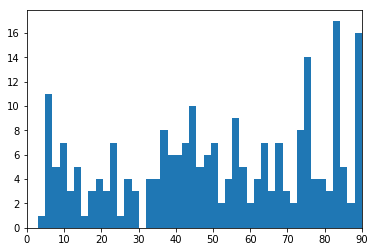

Bournemouth


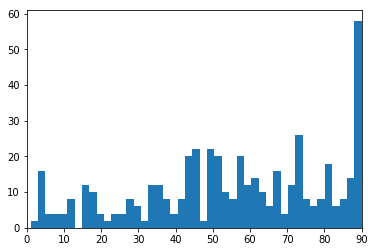

Brighton


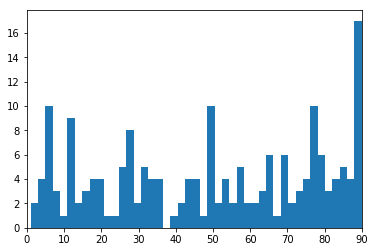

Burnley


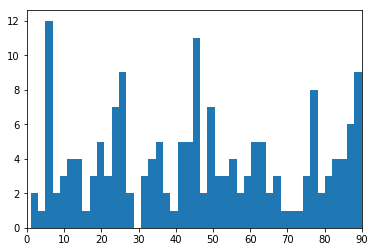

Cardiff


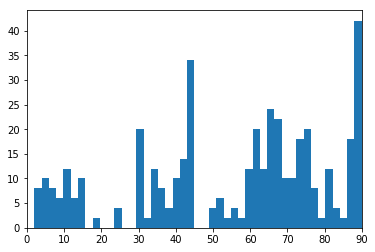

Chelsea


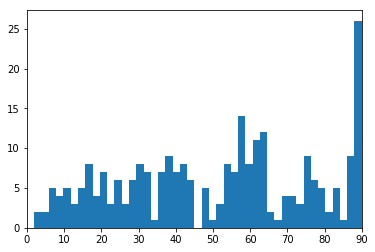

Crystal Palace


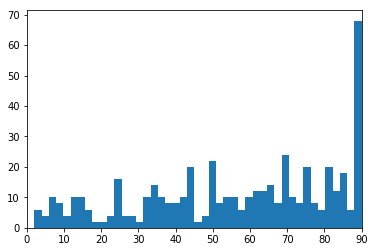

Everton


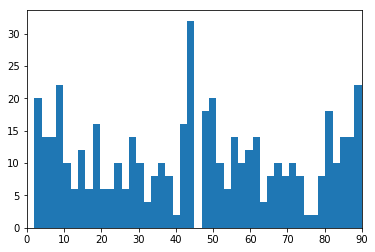

Fulham


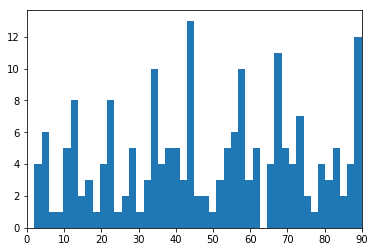

Huddersfield


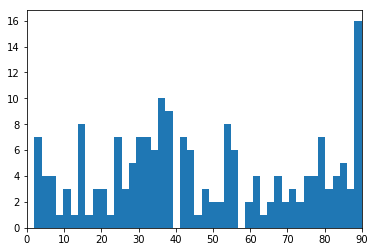

Leicester


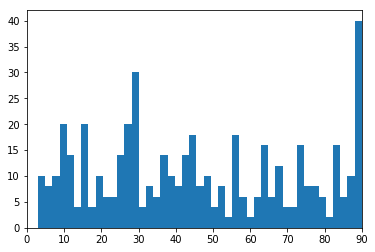

Liverpool


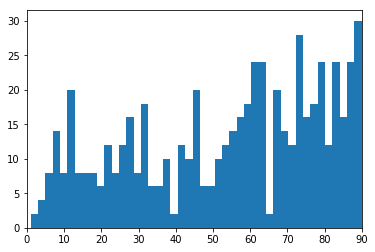

Manchester City


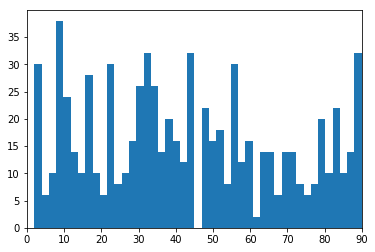

Manchester United


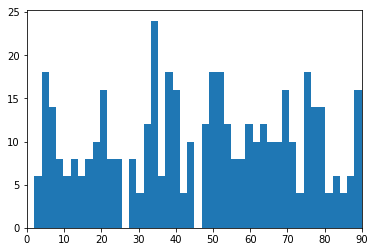

Newcastle United


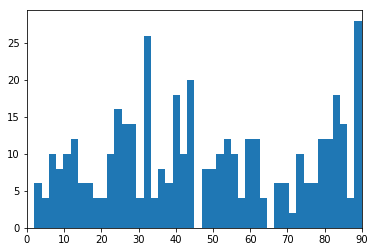

Southampton


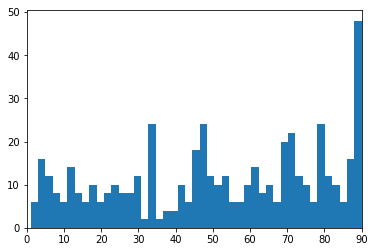

Tottenham


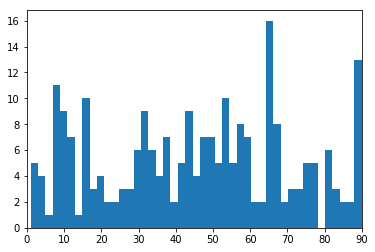

Watford


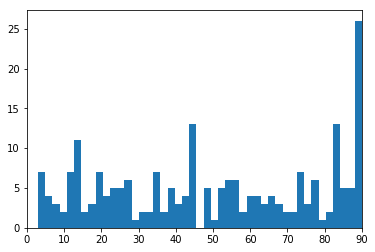

West Ham


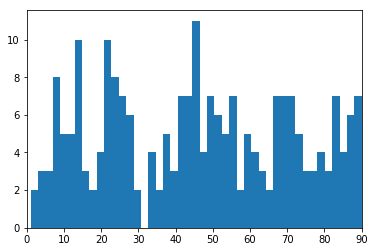

Wolverhampton Wanderers


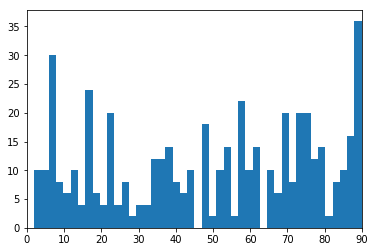

In [99]:
#df_teams_corners_per_minute['Season'] == '2016/2017'
#df_teams_corners_per_minute = df_teams_corners_per_minute[(df_teams_corners_per_minute['League'] == 'Premier League') ]

#print(df_teams_corners_per_minute.head(5))
#df_teams_corners_per_minute.head()

groups = df_corners_per_team.groupby(['FullName'])

print(groups.head())
groups.describe()
import matplotlib.pyplot as plt
for group in groups:
    #figure()
    #plt.
    print(group[1].FullName.values[0])
    plt.hist(group[1].Minute, bins=45)
    #cumulative=1, density=True, histtype='step'
    axes = plt.gca()
    axes.set_xlim([0,90])
    #axes.set_ylim([0,50])
    plt.show()
   
#df_teams_corners_per_minute['Minute'].hist(by=df_teams_corners_per_minute['count'])

In [100]:
stmt = "SELECT * FROM Corners"
# Excute Query here
df_corners = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_corners.shape)
df_corners.head()

result = pd.merge(df_corners.set_index("MatchId"),df_matches.set_index("ExternalId"), how='left')
#df.set_index("id"), df2.set_index("user_id"), left_index=True, right_index=True,  how="outer"

#result_1718 = result[result.Season == '2017/2018']

#premier_league = result[(result['Season']  == '2017/2018') & (result['League']  == 'Premier League')]

premier_league = result[ (result['Season'] == '2017/2018') & (result['League'] == 'Ligue 1')]
print(result.shape)

#groups = premier_league.groupby(['MatchId'])
#groups.groups.keys()
#df_goals.head()
#groups = df_corners.groupby(['MatchId'])
#groups.groups.keys()
df_goals.head()
minutes_sum = df_corners.groupby(['MatchId', 'TeamId']).apply(
    lambda x: "{%s}" % ', '.join(x.Minute + ' '))
#minutes_sum = df_corners.groupby('MatchId')['MatchId', 'TeamId','Minute']
#print(premier_league[:10].head())
#print(result_premier_league_1718)
premier_league_minutes = premier_league[premier_league['Minute'].notnull()]
print(premier_league_minutes.shape)
minutes_sum
#print(list(premier_league_minutes.columns.values))

(78204, 6)
(78204, 13)
(380, 13)


MatchId  TeamId
1709697  9837                                                  {52 }
         9847                              {15 , 44 , 51 , 73 , 90 }
1709698  7794                                                  {36 }
         8592                                   {20 , 20 , 43 , 52 }
1709699  4087                              {21 , 67 , 83 , 84 , 88 }
         7819                         {19 , 30 , 54 , 58 , 60 , 63 }
1709700  9747                                   {24 , 45 , 54 , 58 }
         9853                              {20 , 23 , 37 , 52 , 75 }
1709701  8550                                        {12 , 63 , 63 }
         8639                {9 , 11 , 26 , 36 , 40 , 71 , 85 , 87 }
1709702  9748                               {6 , 18 , 45 , 48 , 23 }
         9851                                                  {60 }
1709703  8689                                   {38 , 42 , 46 , 81 }
         9829      {19 , 20 , 43 , 43 , 49 , 50 , 50 , 54 , 71 , ...
1709704  10249    

In [101]:
stmt = "SELECT * FROM Goals"
# Excute Query here
df_goals = pd.read_sql(stmt,conn)
print(df_goals.shape)
df_goals.head()


(22244, 8)


,Id,MatchId,ExternalId,Minute,ScorerId,AssistId,Type,TeamId
0,1,1723982,3647567,35,26777,35345,header,9826
1,2,1723985,3649433,23,246575,156008,shot,8650
2,3,1723983,3652629,14,37240,24372,shot,8191
3,4,1723984,3645927,20,32448,None,shot,8668
4,5,1723982,3647657,45,46539,50047,header,9825


In [102]:
print(df_matches.shape)
print(df_goals.shape)
goals = pd.merge(df_matches.set_index("ExternalId"), df_goals.set_index("MatchId"),  how='left')
#result = goals[goals['Minute'].notnull()]
print(goals.shape)
#group by season
premier_league = goals[(goals['League'] == 'Premier League') & (goals['Season'] == '2016/2017')]
premier_league.head()

premier_league['Minute'] = premier_league['Minute'].astype(int)
#premier_league.loc[premier_league['Minute']] = premier_league['Minute'].astype(int)

for number in range(0, 90, 10):
    from_minute = number
    to_minute = number + 10
    goals_by_minute = premier_league.groupby(['TeamId'])['Minute'].apply(
        lambda x: len(x.where(
            lambda y : y > from_minute).where(lambda z:z < to_minute).dropna()))   
    #print(goals)
    #with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
       # print(goals)
#goals_teams = goa
#len(teams.groups)
premier_league.head(2)

(7836, 10)
(22244, 8)
(7836, 15)


C:\Users\martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Id,Date,Country,League,Season,Stage,Player_Id,AwayTeam_Id,HomeTeam_Id,ExternalId,Minute,ScorerId,AssistId,Type,TeamId
760,761,2016-08-15 15:00:00,England,Premier League,2016/2017,1,None,1544,1545,4453319,7,278343,26554,distance,8197
761,762,2016-08-15 15:00:00,England,Premier League,2016/2017,1,None,1546,1547,4453624,19,278343,286119,shot,8197


In [103]:
result = pd.merge(df_matches.set_index("ExternalId"), df_corners.set_index("MatchId"),  how='left')
#premier_league = result[(result['Season']  == '2017/2018') & (result['League']  == 'Premier League')]
premier_league = result[ (result['Season'] == '2017/2018') & (result['League'] == 'Ligue 1')]
#print(result.shape)


#teams_coreners = df_corners.groupby('TeamId')
goal_matches = pd.merge(df_corners.set_index("MatchId"), df_matches.set_index("ExternalId"), how='right')

#goal_matches_home_team = pd.merge(goal_matches.set_index("HomeTeam_Id"), df_teams.set_index("ExternalId"), how='left')
#goal_matches_home_team.rename(columns={'Ful': 'FullNameHome'}, inplace=True)
#goal_matches_home_team.rename(columns={'Acronym': 'AcronymHome'}, inplace=True)
#goal_matches_home_team.rename(columns={'TeamId': 'HomeTeamId'}, inplace=True)
#goal_matches_home_team_away_team = pd.merge(goal_matches_home_team.set_index("AwayTeam_Id"), df_teams.set_index("ExternalId"), how='left')
#goal_matches_home_team_away_team
#goal_matches_home_team
result.head(2)
#goal_matches_home_team_away_team
#['Minute','TeamId'].apply(
#    lambda x: "{%s}" % ', '.join(x.Minute + ' ' + x.TeamId))
#minutes_sum = result.groupby(['TeamId'], as_index=True)['Minute']hg
#minutes_sum
#['Minute']
#minutes_sum = df_corners.groupby('MatchId')['MatchId', 'TeamId','Minute']
#print(premier_league[:10].head())
#print(result_premier_league_1718)
#premier_league_minutes = premier_league[premier_league['Minute'].notnull()]
#print(premier_league_minutes.shape)
#minutes_sum.first()
#print(list(premier_league_minutes.columns.values))

,Id,Date,Country,League,Season,Stage,Player_Id,AwayTeam_Id,HomeTeam_Id,ExternalId,Minute,Player1,TeamId
0,1,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,15,12,3647429,15,37436,9825
1,2,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,14,10,3649357,9,30618,8650


In [104]:
goals = pd.merge( df_matches.set_index("ExternalId"), df_goals.set_index("MatchId"), how='left')
#result = goals[goals['Minute'].notnull()]
print(result.shape)
premier_league = goals[(goals['League'] == 'Premier League') & (goals['Season'] == '2016/2017')]
premier_league.head(2)

#premier_league['Minute'] = premier_league['Minute'].astype(int)
#premier_league.loc[premier_league['Minute']] = premier_league['Minute'].astype(int)

#premier_league['TeamId'].hist(by=premier_league['Minute'])

# for number in range(0, 90, 10):
#     from_minute = number
#     to_minute = number + 10
#     goals = premier_league.groupby(['TeamId'])['Minute'].apply(lambda x: len(x.where(lambda y : y > from_minute).where(lambda z:z < to_minute).dropna()))   
#     print(goals)
# #goals_teams = goa
# #len(teams.groups)

#print(teams.groups.keys())

(7836, 13)


,Id,Date,Country,League,Season,Stage,Player_Id,AwayTeam_Id,HomeTeam_Id,ExternalId,Minute,ScorerId,AssistId,Type,TeamId
760,761,2016-08-15 15:00:00,England,Premier League,2016/2017,1,None,1544,1545,4453319,7,278343,26554,distance,8197
761,762,2016-08-15 15:00:00,England,Premier League,2016/2017,1,None,1546,1547,4453624,19,278343,286119,shot,8197


In [105]:
#groups = df_goals.groupby(['MatchId'])
#groups.groups.keys()
#df_goals.head()
minutes_sum = df_goals.groupby(['MatchId', 'TeamId',], as_index=True, sort=True)
#minutes_sum.last()
minutes_sum.count()
#print(minutes_sum.shape)
#df_goals.head(10)
#groups.groups['1709877']
#minutes_sum.groups
#result = minutes_sum.get_group(('1709702','9748'))

Id  ExternalId  Minute  ScorerId  AssistId  Type
MatchId TeamId                                                  
1709697 9837     2           2       2         2         2     2
        9847     3           3       3         3         2     3
1709698 7794     4           4       4         4         1     2
        8592     2           2       2         2         1     1
1709699 7819     3           3       3         3         2     3
1709700 9853     2           2       2         2         0     1
1709702 9748     2           2       2         2         1     1
1709703 8689     2           2       2         2         1     1
        9829     1           1       1         1         0     0
1709704 9827     1           1       1         1         1     1
1709705 9830     1           1       1         1         1     1
1709706 9831     3           3       3         3         3     3
        9941     2           2       2         2         2     2
1709707 9827     4           4       4         4         2     2
        9829     1           1       1         1         1     1
1709708 8639     1           1       1         1         0     0
1709709 9747     1           1       1         1         0     1
1709711 10249    2           2       2         2         2     2
        8592     1           1       1         0         0     0
1709712 8550     1           1       1         1         0     0
        9830     1           1       1         1         0     1
1709713 9847     2           2       2         2         2     2
1709714 4087     2           2       2         2         1     2
        9851     6           6       6         6         6     6
1709715 9853     4           4       4         4         2     3
1709716 9748     1           1       1         1         1     1
        9941     3           3       3         2         1     2
1709717 7794     1           1       1         1         0     0
1709719 8592     1           1       1         1         1     1
1709720 8639     2           2       2         2         0     2
...             ..         ...     ...       ...       ...   ...
2844469 8633     4           4       4         4         2     2
2844470 8558     2           2       2         2         1     2
2844471 9906     1           1       1         1         1     1
2844473 8305     2           2       2         2         1     2
2846841 8524     4           4       4         4         4     4
2846842 8547     1           1       1         1         1     1
2846843 8533     3           3       3         3         1     1
        9885     2           2       2         2         2     2
2846844 8534     2           2       2         2         1     2
2846845 8543     1           1       1         1         1     1
        9875     2           2       2         2         2     2
2846847 674792   2           2       2         2         1     2
        8600     2           2       2         2         1     1
2846848 7943     1           1       1         1         0     0
2846849 8686     1           1       1         1         1     1
2846851 7943     2           2       2         2         1     1
        8529     2           2       2         2         2     2
2846852 8533     1           1       1         1         1     1
        8535     6           6       6         6         4     6
2846854 10233    2           2       2         2         2     2
        8534     1           1       1         1         1     1
2846855 8636     2           2       2         2         2     2
        9804     2           2       2         2         1     2
2846856 9885     2           2       2         2         1     2
2846857 8564     2           2       2         2         2     2
        9875     3           3       3         3         2     3
2846858 8524     3           3       3         3         2     3
        8686     3           3       3         3         2     3
2846859 8547     1           1       1         1   

In [106]:
# def get_last_matches(date, team, x = 10):
#     ''' Get the last x matches of a given team. '''
    
#     #Filter team matches from matches
#     team_matches = df_matches[(df_matches['HomeTeam'] == team) | (df_matches['AwayTeam'] == team)].drop_duplicates(['ExternalId'])
#     team_matches['ExternalId'] = team_matches['ExternalId'].astype(int)
#     #Filter x last matches from team matches
#     last_matches = team_matches[team_matches.Date < date].sort_values(by = 'Date', ascending = False).iloc[0:x,:]

#     #Return last matches
#     return last_matches

# last_matches = get_last_matches("2018-08-27 15:00:00", "Arsenal")
# last_matches.head()